# Time Series Test Errors and Cross-Validation

<q>Prediction is very difficult, especially if it's about the future.</q>

--Nils Bohr, Nobel laureate in Physics 

This quote reiterates what we've said about making predictions in the regression material. We can make a model that is very good at fitting the data we have but there is no guarantee that model does well on unseen data (the future in time series).

Thus, before introducing more time series forecasting models we'll quickly review how we can adjust the way we compute test errors and perform cross validation. These techniques allow us to attempt to find a model that predicts well.

## What You'll Accomplish

In particular you'll:
<ul>
    <li>Compute test errors for the average and na&iuml;ve methods on the marathon data,</li>
    <li>Learn about the differences for cross-validation,</li>
    <li>Perform cross-validation on the measles data to compute the best method among the average, na&iuml;ve and, seasonal na&iuml;ve methods</li>
</ul>

Let's import the packages we'll need

In [1]:
# import the packages we'll use
from datetime import datetime

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Test Errors

Although we are working with time series data, the error measures we use will still be MSE and RMSE. 

In this setting we can refer to the test error as the forecast errors.

Let $T$ be the length of the entire time series, $T_{\text{train}}$ be the length of the training set, let $y_t$ be the target value observed at time $t$, and assume you have some algorithm that produces a prediction, $\hat{y}_t$ at time $t$.

Then the testing MSE is given by:
$$
MSE = \frac{1}{T - T_{\text{train}}} \sum_{t = T_{\text{train}} + 1}^T \left( y_t - \hat{y}_t \right)^2,
$$

and $RMSE = \sqrt{MSE}$.

### Horizons

The <i>horizon</i> of your model is how far out you'd like to predict. For example:
<ul>
    <li>A model that predicts next quarter's earnings has a horizon of $1$ quarter,</li>
    <li>Predicting monthly cases of influenza in 2021 would be a model with a horizon of $1$ year or $12$ months,</li>
    <li>A model predicting daily mileage in July 2020 would have a horizon of $1$ month or $31$ days.</li>
</ul>

Your desired forecasting horizon (how far out into the future you'd like to predict) should determine how large your test set is.

## Practice

Return to the `marathon` data. We'd like to see if we could predict out the winning times over the next $5$ years.

Using both the average method and the na&iuml;ve methods compute the test RMSE. Which method performs better on this data?

In [2]:
marathon = pd.read_csv("marathon.csv", parse_dates = ['year'])

In [4]:
## Make the train test split here.

HORIZON = 5 
N = len(marathon)
marathon_train = marathon.iloc[:N-HORIZON]
marathon_test = marathon.iloc[N-HORIZON:]

In [12]:
## Calculate the Average Method RMSE here

# moving average method 
marathon['MA'] = marathon.rolling(HORIZON).mean()

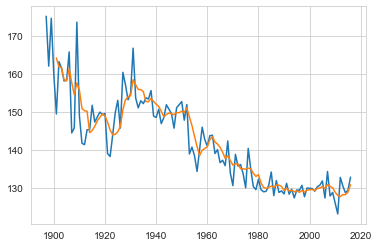

In [13]:
plt.plot(marathon['year'], marathon['time'])
plt.plot(marathon['year'], marathon['MA'])

In [ ]:
## Calculate the Naive Method RMSE here
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(marathon_MA['time'][HORIZON:], marathon['time'][HORIZON:])

16.601183476791878

## Cross-Validation with Time Series

Just like we can't randomly sample for the train test split, we also can't randomly sample for cross-validation.

Let's explain what you can do with a figure.

<img src="TimeSeriesCV.png" style="width:80%"></img>

Just like we've done up to this point you make a train test split. In the image the training data is blue and the test data is red. In this example our horizon is $4$ time units.

Now using the training data we have made three CV splits. We treat each split like a new data set. In the first one we use the first $4$ time points to predict on the second $4$. Then we use the first eight points to predict on the next $4$. Our final split uses the first $12$ points to predict on the last $4$.

Just like with regression we'd calculate MSE or RMSE on each CV split and find the arithmetic mean across all splits.

If you have a set horizon in mind your cv splits should reflect that horizon. For example, if you use cv to see how well your model predicts $1$ time step forward, but then you actually use that model to predict out $4$ time steps forward you shouldn't be shocked if your predictions don't go too well.

### Practice

Again return to the pre-1963 measles data. Using cross-validation calculate the average RMSE for the average,  na&iuml;ve, and seasonal na&iuml;ve methods. Use a $24$ month horizon. Which model do we expect to perform best?

In [ ]:
measles = pd.read_csv("measles.csv", parse_dates=['month'])
measles_pre1963 = measles.loc[measles.month < datetime(1963,1,1),]

In [ ]:
## Make the train test split here



In [ ]:
## Make CV splits here







In [ ]:
## Make any functions you want to calculate
## average rmse here









In [ ]:
## RMSE for Average Method Here 








In [ ]:
## RMSE for the Naive Method here








In [ ]:
## RMSE for the Seasonal Naive method here








In [ ]:
## Compare here








That's it for this notebook!

Next we'll see one of the two more advanced forecasting techniques touched on in the Time Series notebooks.

### References

Section 3.4 of <a href="https://otexts.com/fpp2/">Forecasting: Principles and Practice</a>, by Rob J Hyndman and George Athanasopoulos.